# Load image

In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dog = cv2.imread('demo.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

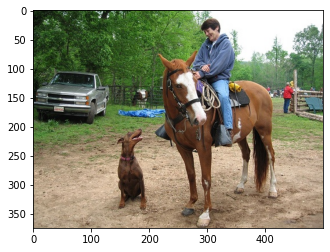

In [3]:
plt.imshow(dog)

In [4]:
# Image preprocessing
input = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

# NHWC -> NCHW
input = np.array(input).transpose((2, 0, 1))
input = torch.from_numpy(input)[None]

# FasterRCNN Inference

In [5]:
from what.models.detection.frcnn.faster_rcnn import FasterRCNN
from what.models.detection.utils.box_utils import draw_bounding_boxes
from what.models.detection.datasets.voc import VOC_CLASS_NAMES

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
model = FasterRCNN(device=device)
model.load('models/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth', map_location=device)

FasterRCNN(
  (faster_rcnn): FasterRCNNVGG16(
    (extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inpl

In [8]:
inputs, boxes, labels, scores = model.predict(input)

# Display output

In [9]:
output = draw_bounding_boxes(dog,
        boxes[0],
        labels[0],
        VOC_CLASS_NAMES[1:],
        scores[0])

car: 1.00
horse: 1.00
person: 0.98
person: 0.98


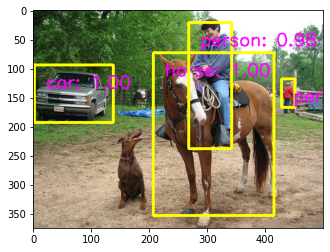

In [10]:
plt.imshow(output)